In [3]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

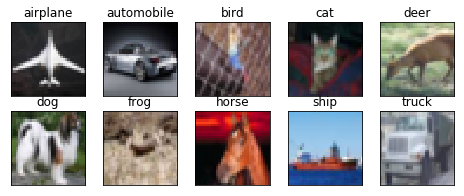

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [6]:
train_features.shape

(50000, 32, 32, 3)

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Fully connected layer model

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 15, 15, 96)        41568     
__________

In [0]:
from keras.callbacks import ModelCheckpoint
filepath="Best_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
from keras.layers import *

## Optimized version of the previous Model with proper transition blocks and and proper use of dropout and l2 regularizer  with the parameter constraint of 455626 << 1.7M

In [0]:
def ConvReluBn(model,size=32,kernelSize=(3,3),dout=0):
  
  model.add(Convolution2D(size, kernel_size=kernelSize,border_mode='same',kernel_regularizer=regularizers.l2(0.0001),activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(dout))
  return model
  

  

In [0]:

model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu',input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model=ConvReluBn(model,size=64,dout=0.25)



model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model=ConvReluBn(model,size=32,kernelSize=(1,1))


model=ConvReluBn(model,size=64,dout=0.25)
model=ConvReluBn(model,size=128,dout=0.25)


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model=ConvReluBn(model,size=32,kernelSize=(1,1))


model=ConvReluBn(model,size=128,dout=0.25)
model=ConvReluBn(model,size=256,dout=0.3)


model.add(Convolution2D(10, 1,1))

model.add(GlobalAveragePooling2D())



model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), kernel_regularizer=<keras.reg..., activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(1, 1), kernel_regularizer=<keras.reg..., activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kern

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_135 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_96 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_97 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_100 (Dropout)        (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_101 (Dropout)        (None, 16, 16, 64)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=10)`
  app.launch_new_instance()


Epoch 1/10
390/390 [==============================] - 44s 113ms/step - loss: 1.4209 - acc: 0.5009 - val_loss: 1.3621 - val_acc: 0.5520

Epoch 00001: val_acc improved from -inf to 0.55200, saving model to Best_weights.hdf5
Epoch 2/10
390/390 [==============================] - 37s 95ms/step - loss: 1.0556 - acc: 0.6426 - val_loss: 1.0146 - val_acc: 0.6657

Epoch 00002: val_acc improved from 0.55200 to 0.66570, saving model to Best_weights.hdf5
Epoch 3/10
390/390 [==============================] - 37s 95ms/step - loss: 0.9195 - acc: 0.6954 - val_loss: 1.0711 - val_acc: 0.6466

Epoch 00003: val_acc did not improve from 0.66570
Epoch 4/10
390/390 [==============================] - 37s 95ms/step - loss: 0.8308 - acc: 0.7298 - val_loss: 0.8197 - val_acc: 0.7351

Epoch 00004: val_acc improved from 0.66570 to 0.73510, saving model to Best_weights.hdf5
Epoch 5/10
390/390 [==============================] - 37s 95ms/step - loss: 0.7627 - acc: 0.7569 - val_loss: 0.8415 - val_acc: 0.7329

Epoch 0000

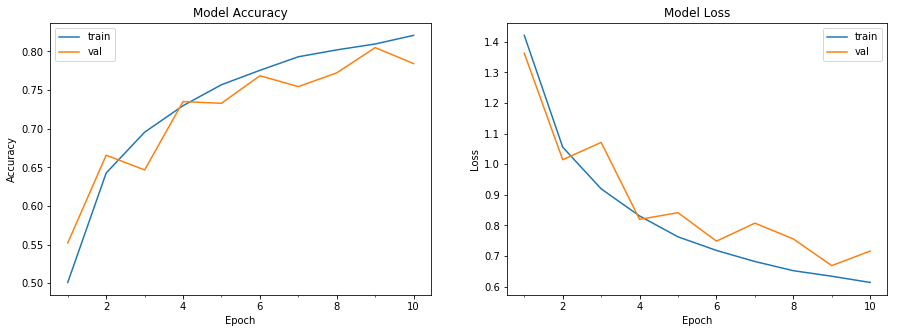

Accuracy on test data is: 78.43


In [0]:
from keras.callbacks import ModelCheckpoint
filepath="Best_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 10, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Epoch 1/90
  1/390 [..............................] - ETA: 45s - loss: 0.5497 - acc: 0.8281

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=90)`
  """


390/390 [==============================] - 37s 95ms/step - loss: 0.5973 - acc: 0.8273 - val_loss: 0.7947 - val_acc: 0.7716

Epoch 00001: val_acc did not improve from 0.80500
Epoch 2/90
390/390 [==============================] - 37s 95ms/step - loss: 0.5811 - acc: 0.8349 - val_loss: 0.8804 - val_acc: 0.7528

Epoch 00002: val_acc did not improve from 0.80500
Epoch 3/90
390/390 [==============================] - 37s 95ms/step - loss: 0.5713 - acc: 0.8395 - val_loss: 0.9357 - val_acc: 0.7326

Epoch 00003: val_acc did not improve from 0.80500
Epoch 4/90
390/390 [==============================] - 37s 95ms/step - loss: 0.5599 - acc: 0.8454 - val_loss: 0.6846 - val_acc: 0.8068

Epoch 00004: val_acc improved from 0.80500 to 0.80680, saving model to Best_weights.hdf5
Epoch 5/90
390/390 [==============================] - 37s 95ms/step - loss: 0.5463 - acc: 0.8499 - val_loss: 0.8021 - val_acc: 0.7662

Epoch 00005: val_acc did not improve from 0.80680
Epoch 6/90
390/390 [===========================

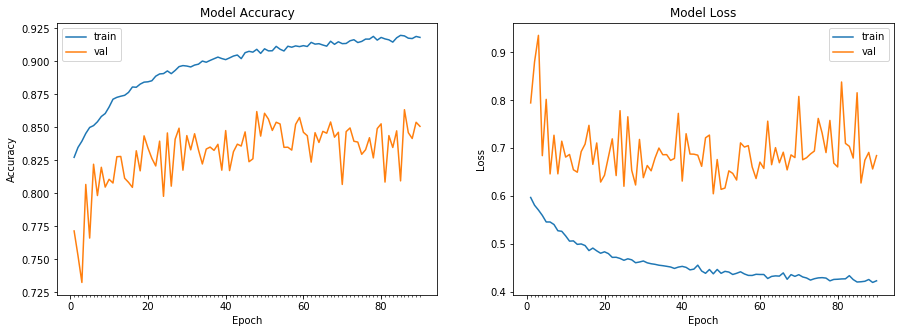

Accuracy on test data is: 85.08


In [0]:
# model=Model()
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# from keras.callbacks import ModelCheckpoint
# filepath="Best_weights.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,zoom_range=0.0, 
#                              horizontal_flip=False)


# # train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 90, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
!ls

Best_weights.hdf5  sample_data


## Loading the saved Model from drive

In [0]:
from keras.layers import *
from keras.models import load_model

In [17]:
from google.colab import drive

drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
model_path ='''/gdrive/My Drive/EVA2019/6A_model.hdf5'''

In [0]:
img_path ='''/gdrive/My Drive/EVA2019/cat.jpeg'''

In [20]:
model=load_model(model_path)

W0627 18:41:28.851874 140143747749760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 18:41:28.871825 140143747749760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 18:41:28.898297 140143747749760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 18:41:28.899408 140143747749760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0627 18:41:28.900367 140143747

In [204]:
accuracy(test_features, test_labels, model)

86.33999999999999

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_135 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_96 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_97 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_100 (Dropout)        (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_101 (Dropout)        (None, 16, 16, 64)        0         
__________

bird


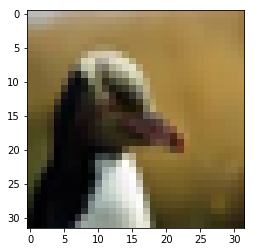

In [211]:
im=test_features[8010]
plt.imshow(im)

img=np.array([im])
print(class_names[np.argmax(model.predict(img))])

In [0]:

from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys


## Visualizing the GradCamoutput Over different layers  

In [0]:
def visualize_GradCam(img,layer_name='conv2d_139'):


  x = img
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer_name)
  print(class_names[class_idx])
#   plt.imshow(img)
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(conv_layer_output_value.shape[-1]):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)    


  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  
  ##Changing the range of values to [1,255] so that they can be taken in by applyColorMap function
  
  heatmap = np.uint8(255*heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  ##Chnaging the range again between [0,1]
  
  heatmap=heatmap.astype('float32')/255

  superimposed_img = cv2.addWeighted(img, 0.7, heatmap, 0.3, 0)
  
  return heatmap,superimposed_img

In [0]:
def show_gradcam(img,layer_name='conv2d_139'):
  

  

  heatmap,superimposed_img=visualize_GradCam(img,layer_name)



  images = []
  images.append(img)
  images.append(heatmap)

  images.append(superimposed_img)

  titles = ['Original Image','HeatMap','gradCam Image']
  f = plt.figure(figsize=(15,15))

  for i in range(len(images)):
      plt.subplot(1,3,i+1),plt.imshow(images[i])
      plt.title(titles[i])
      plt.xticks([]),plt.yticks([])

  plt.show()

airplane


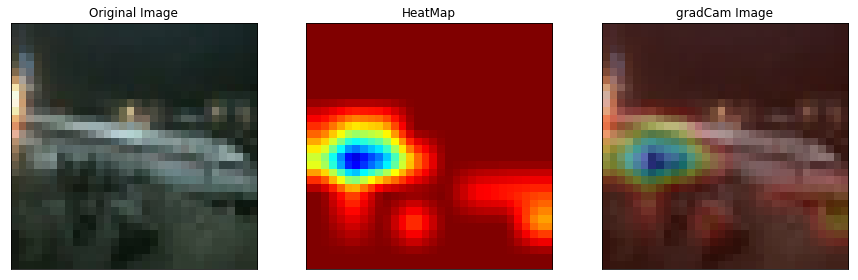

In [216]:
show_gradcam(test_features[1001],layer_name='conv2d_141')

ship


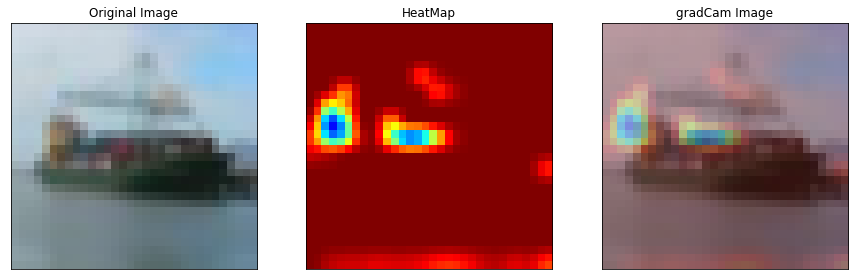

In [222]:
show_gradcam(test_features[1101],layer_name='conv2d_139')

ship


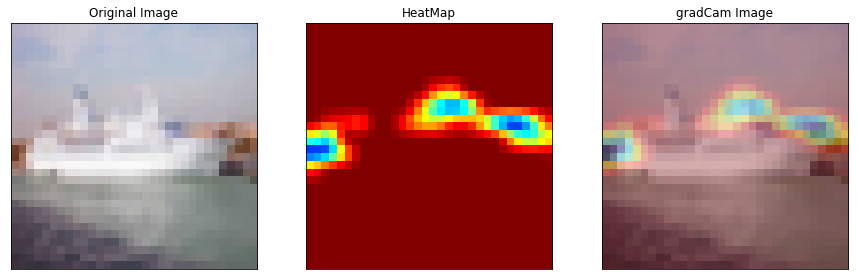

In [223]:
show_gradcam(test_features[1111])

horse


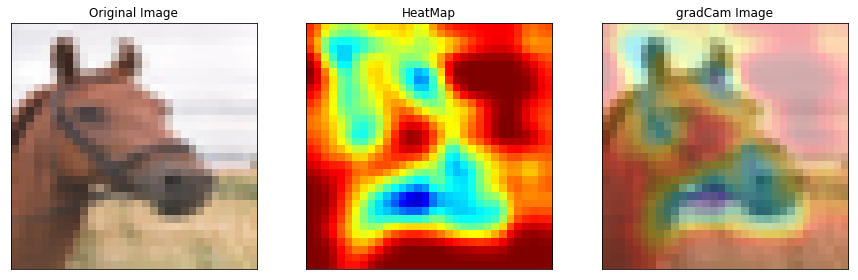

In [224]:
show_gradcam(test_features[99])

bird


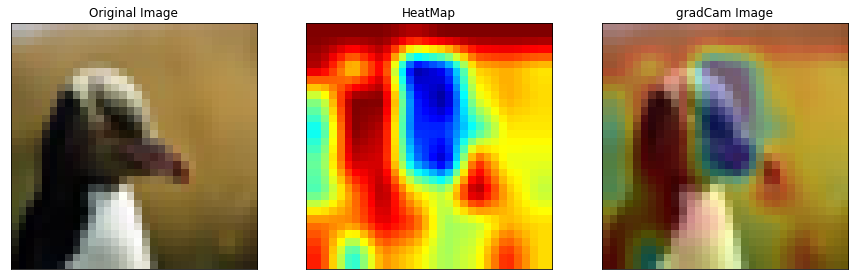

In [226]:
show_gradcam(test_features[8010],layer_name='conv2d_140')